# LGMVIP TASK-1
# LEVEL-INTERMEDIATE
# EXPLORATORY DATA ANALYSIS ON DATASET TERRORISM
# OBJECTIVE - AS A SECURITY/DEFENCE ANALYST TRY TO FIND OUT THE HOT ZONE OF TERRORISM
# AUTHOR - CHIRAG GHOSH

In [51]:
##IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [5]:
##READING AND UNDERSTANDING THE DATASET
data = pd.read_csv("C:\\Users\\CHIRAG\\Desktop\global terrorism.csv",dtype = 'unicode',encoding ='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.97E+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.97E+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.97001E+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.97001E+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.97001E+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.01712E+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.01712E+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.01712E+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.01712E+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.01712E+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [15]:
data.shape

(181691, 135)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: object(135)
memory usage: 187.1+ MB


In [17]:
data.describe()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,181691,181691,181691,181691,9239,181691,2220,181691,181691,181691,...,28289,115500,76933,43516,181691,181691,181691,181691,181691,25038
unique,576,47,13,32,2244,2,1859,205,205,12,...,15429,83988,62263,36090,26,3,3,3,3,14306
top,2.01407E+11,2014,5,15,"September 18-24, 2016",0,08-04-1998,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,-9,-9,0,-9,"201612010023, 201612010024, 201612010025, 2016..."
freq,1726,16903,16875,6500,101,173452,18,24636,24636,50474,...,1607,205,134,139,78002,92527,92659,160467,83830,80


In [13]:
##FINDING NULL VALUES
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [18]:
##TOP 5 COUNTRIES WITH MOST TERRORIST ATTACKS
print(data['country_txt'].value_counts().head(5))

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country_txt, dtype: int64


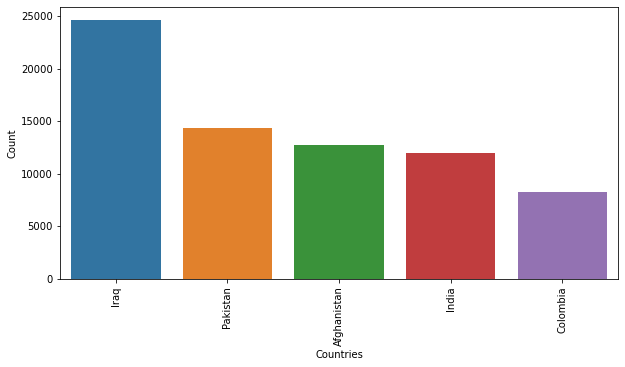

In [19]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['country_txt'].value_counts()[:5].index,data['country_txt'].value_counts()[:5].values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## IRAQ IS THE MOST AFFECTED COUNTRY WITH TERRORIST ATTACKS

In [20]:
##TOP 5 REGIONS WITH MOST TERRORIST ATTACKS
print(data['region_txt'].value_counts().head(5))

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: region_txt, dtype: int64


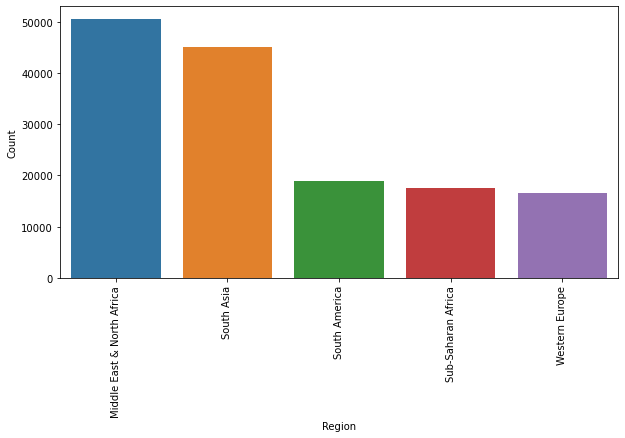

In [21]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['region_txt'].value_counts()[:5].index,data['region_txt'].value_counts()[:5].values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## MIDDLE EAST AND NORTH AFRICA IS THE REGION WITH MOST TERRORIST ATTACKS FOLLOWED BY SOUTH ASIA

In [22]:
##TOP 5 CITIES WITH MOST TERRORIST ATTACKS
print(data['city'].value_counts().head(5))

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: city, dtype: int64


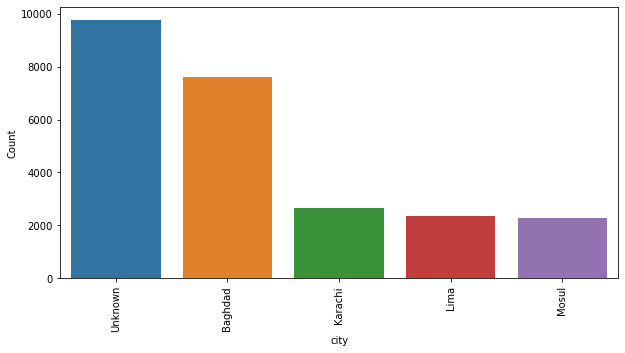

In [23]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['city'].value_counts()[:5].index,data['city'].value_counts()[:5].values)
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## BAGHDAD IS THE CITY WITH MOST TERRORIST ATTACKS SINCE FIRST ONE IS UNKNOWN

In [24]:
##TOP 5 STATES WITH MOST TERRORIST ATTACKS
print(data['provstate'].value_counts().head(5))

Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
Name: provstate, dtype: int64


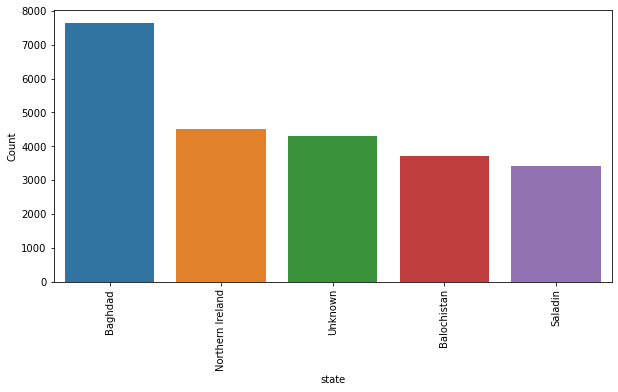

In [25]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['provstate'].value_counts()[:5].index,data['provstate'].value_counts()[:5].values)
plt.xlabel('state')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## BAGHDAD IS THE STATE WITH MOST TERRORIST ATTACKS

In [38]:
## YEARS WITH MOST AND LEAST TERRORIST ATTACKS
print(data['iyear'].value_counts())

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64


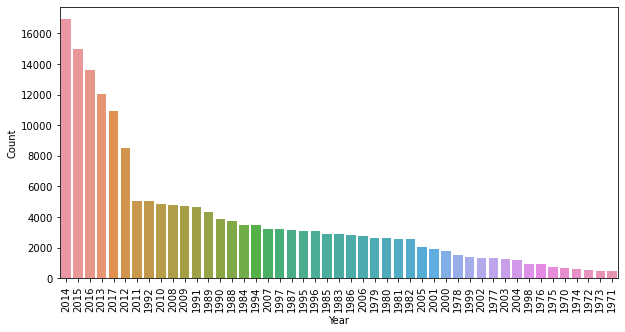

In [40]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['iyear'].value_counts().index,data['iyear'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## 2014 IS THE YEAR WITH THE MOST AND 1971 IS THE YEAR WITH LEAST TERRORIST ACTIVITIES 

In [28]:
##TOP 5 MOST ACTIVE TERRORIST GROUPS
print(data['gname'].value_counts().head(5))

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: gname, dtype: int64


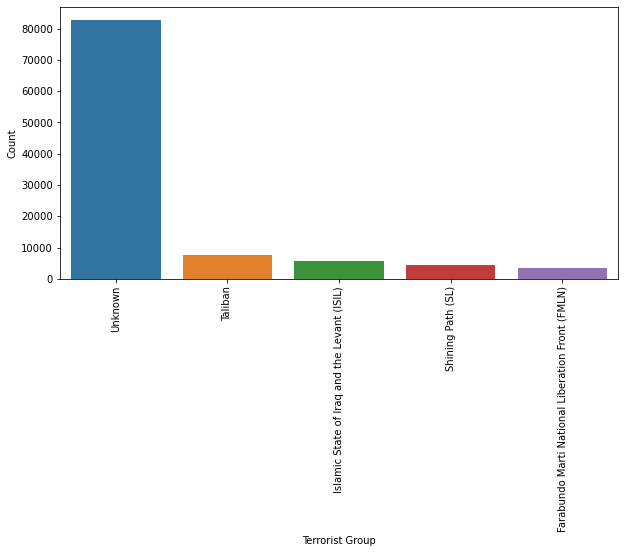

In [29]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['gname'].value_counts()[:5].index,data['gname'].value_counts()[:5].values)
plt.xlabel('Terrorist Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## TALIBAN IS THE MOST ACTIVE TERRORIST GROUP SINCE FIRST ONE IS UNKNOWN

In [30]:
##TOP 5 MONTHS WITH MOST TERRORIST ATTACKS
print(data['imonth'].value_counts().head(5))

5     16875
7     16268
8     15800
10    15563
6     15359
Name: imonth, dtype: int64


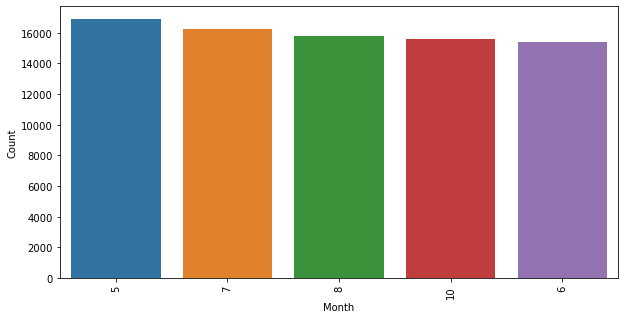

In [31]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['imonth'].value_counts()[:5].index,data['imonth'].value_counts()[:5].values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## MOST TERRORIST ATTACKS TOOK PLACE IN THE MONTH OF MAY

In [48]:
##TOP 5 METHOD OF TERRORIST ATTACKS
print(data['attacktype1_txt'].value_counts().head(5))

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: attacktype1_txt, dtype: int64


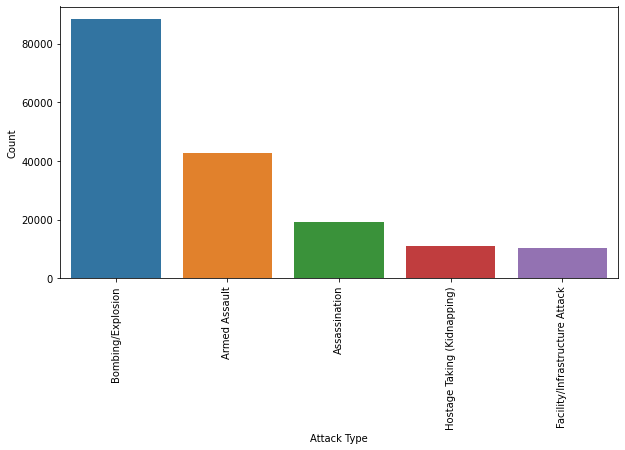

In [49]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['attacktype1_txt'].value_counts()[:5].index,data['attacktype1_txt'].value_counts()[:5].values)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## BOMBING/EXPLOSION IS THE MOST COMMON METHOD USED IN TERRORIST ATTACKS

In [42]:
##TOP 5 TARGETS OF TERRORIST ATTACKS
print(data['targtype1_txt'].value_counts().head(5))

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: targtype1_txt, dtype: int64


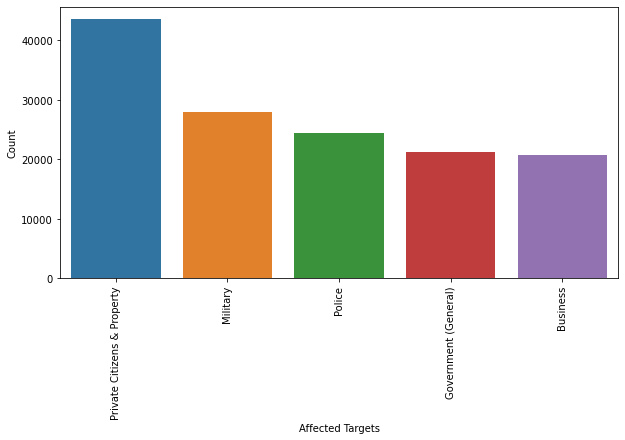

In [43]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['targtype1_txt'].value_counts()[:5].index,data['targtype1_txt'].value_counts()[:5].values)
plt.xlabel('Affected Targets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## PRIVATE CITIZENS AND PROPERTY ARE MOST AFFECTED BY TERRORIST ATTACKS FOLLOWED BY MILITARY,POLICE,GENERAL GOVERNMENT AND BUSINESS 

In [44]:
##TOP 5 WEAPONS USED FOR TERRORIST ATTACKS
print(data['weaptype1_txt'].value_counts().head(5))

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: weaptype1_txt, dtype: int64


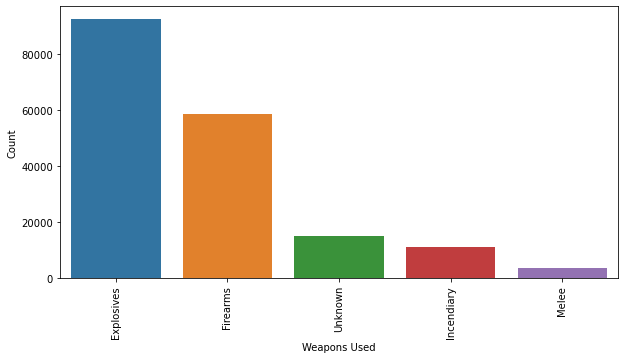

In [45]:
##PLOTTING THE SAME IN A BAR GRAPH
plt.figure(figsize = (10,5))
sns.barplot(data['weaptype1_txt'].value_counts()[:5].index,data['weaptype1_txt'].value_counts()[:5].values)
plt.xlabel('Weapons Used')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## EXPLOSIVES ARE MOSTLY USED AS WEAPONS FOR TERRORIST ATTACKS

In [46]:
data['success'].value_counts()

1    161632
0     20059
Name: success, dtype: int64

In [ ]:
## TERRORISTS ARE SUCCESSFUL 161632 TIMES AND FAILED 20059 IN CONDUCTING TERRORIST ATTACKS

In [47]:
data['suicide'].value_counts()

0    175058
1      6633
Name: suicide, dtype: int64

In [ ]:
## 6633 PEOPLE COMMITTED SUICIDE DURING THE ATTACKS

# CONCLUSIONS

1. MOST AFFECTED COUNTRY- IRAQ
2. MOST AFFECTED STATE- BAGHDAD
3. MOST AFFECTED CITY- BAGHDAD
4. MOST AFFECTED REGION- MIDDLE EAST AND NORTH AFRICA
5. MOST TERRIFIC YEAR- 2014
6. YEAR WITH LEAST TERRORIST ACTIVITIES- 1971
7. MOST COMMONLY USED ATTACK TYPE- BOMBING/EXPLOSION
8. WEAPON USED MOST NUMBER OF TIMES- EXPLOSIVES
9. MOST ACTIVE TERRORIST GROUP WITH MAXIMUM NUMBER OF ATTACKS- TALIBAN
10. AFFECTED TARGETS OF TERRORIST ATTACKS - PRIVATE CITIZENS AND PROPERTY ARE MOST AFFECTED BY TERRORIST ATTACKS FOLLOWED BY MILITARY,POLICE,GENERAL GOVERNMENT AND BUSINESS 
11. MONTH WITH MOST ATTACKS- MAY
## THEY WERE SUCCESS MOST NUMBER OF TIMES IN THEIR ATTACKS


# HOTZONE OF TERRORISM: IRAQ

# THANK YOU

